# Imports and Commands

## Imports

In [1]:
##ALL OF THE IMPORTS AND SUCH

from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.cm
import math
import cmath
from numpy import genfromtxt
import colorcet as cc
import random
import aotools
import itertools
from tqdm import tqdm as progress

import numpy as np
from numpy.linalg import eig,eigh
import scipy as sp

plt.style.use('dark_background')

## Colourmaps

In [2]:
#Generate Colormap Intensity
cmap = np.zeros([256, 4])
cmap[:, 3] = np.linspace(0, 1, 256)
cmap[:, 0]= np.linspace(0, 0, 256)
cmap[:, 1]= np.linspace(0, 0, 256)
cmap[:, 2]= np.linspace(0, 0, 256)
#Intensity colours
imap = matplotlib.colors.ListedColormap(cmap)
#Phase colours
pmap= cc.m_CET_C6

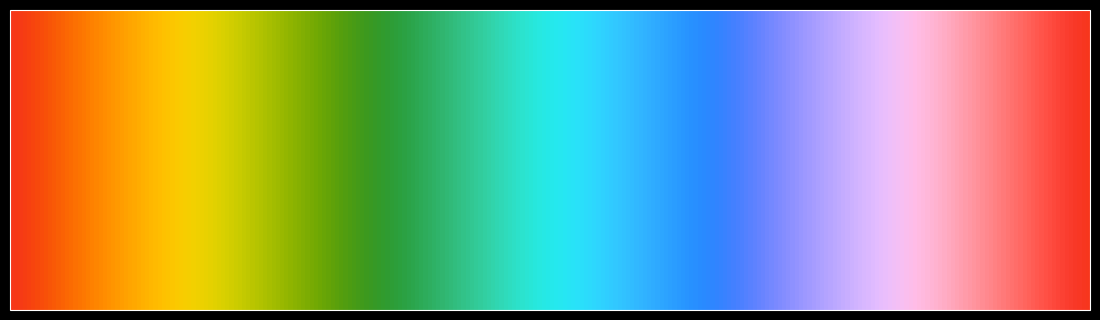

In [3]:
#Generate Phase colormap
import pylab as pl
import numpy as np

a = np.array([[0,1]])
pl.figure(figsize=(9, 1.5))
img = pl.imshow(a, cmap=pmap)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.1, 1.2, 2])
pl.colorbar(orientation="horizontal", cax=cax, ticks=[])
pl.savefig("colorbar.png")

## Functions

### Generate Beams

In [4]:
#These are some functions for making beams in the OAM Basis

# Generate mode list for complex superposition beams 
def ell(d):
    if d%2 == 0:
        l=np.linspace(-np.floor(d/2),np.floor(d/2),d+1,dtype=int)
        l=l[l != 0]
    else:
        l=np.linspace(-np.floor(d/2),np.floor(d/2),d,dtype=int)
    return l

#Phases for arbitrary MUBs in prime dimensions
def MUBphases(d,MUB):
    phi,p=[],[]
    for state in range(d):
        for j in range(d):
            p.append(((2*np.pi/d)*(MUB*(j**2)+state*j)))
        phi.append(p)
        p=[]
    return phi

#Mixing large amount of beams in a loop
def MixManyBeams(beams):
    if len(beams) > 1:
        beams[1]=BeamMix(beams[0],beams[1])
        beams.pop(0)
        MixManyBeams(beams)
    return beams[0]

#OAM beams 
def OAM(state: int=0 ,phase=0,amp=1):
    F=Begin(size,wavelength,N)
    F=GaussLaguerre(F, w0, p=0, l=state, A=amp*(1/w0)*np.sqrt(2/(np.pi*(math.factorial(abs(state))))), ecs=0)
    F=SubPhase(F,Phase(F)+phase)
    return F

#Arbitrary ANG mode in dimension d
def ANG(d,state,norm=0):
    intensityNorm=[1,1,187.3568368182197,302.7415771427128,281.4774347094998,342.95046333063704,1,330.2491174614896,276.25225696328897,1,1,1,1,1,1,1,1,1,1,1,1,1]
    Q,p=[],[]
    l=ell(d)
    
    for i in range(d):
        p.append((2*np.pi/d)*i*state)

    for i in range(d):
        Q.append(OAM(l[i],p[i]))

    F=MixManyBeams(Q)

    if norm==1:
        return [F,intensityNorm[d]]
    else:
        return F

#Arbitrary MUB in d dimensions {2,3,4,5,7,8}
def ArbMUB(d,MUB,state,norm=0):
    intensityNorm=[1,1,187.3568368182197,302.7415771427128,281.4774347094998,342.95046333063704,1,330.2491174614896,276.25225696328897,1,1,1,1,1,1,1,1,1,1,1,1,1]
    Q,p=[],[]
    l=ell(d)
    if d==2:
        p=[[[0,0],[0,np.pi]],[[0,np.pi/2],[0,3*np.pi/2]]][MUB][state]
    elif d==4:
        p=[[[0,0,0,0],[0,np.pi,np.pi,0],[0,0,np.pi,np.pi],[0,np.pi,0,np.pi]],[[0,np.pi/2,np.pi/2,np.pi],[0,3*np.pi/2,3*np.pi/2,np.pi],[0,np.pi/2,3*np.pi/2,0],[0,3*np.pi/2,np.pi/2,0]],[[0,0,3*np.pi/2,np.pi/2],[0,np.pi,np.pi/2,np.pi/2],[0,0,np.pi/2,3*np.pi/2],[0,np.pi,3*np.pi/2,3*np.pi/2]],[[0,3*np.pi/2,0,np.pi/2],[0,np.pi/2,np.pi,np.pi/2],[0,np.pi/2,0,3*np.pi/2],[0,3*np.pi/2,np.pi,3*np.pi/2]]][MUB][state]
    elif d==8:
        p=[[[0,0,0,0,0,0,0,0],[0,np.pi/2,np.pi/2,np.pi,np.pi/2,np.pi,np.pi,3*np.pi/2],[0,np.pi/2,0,np.pi/2,0,3*np.pi/2,np.pi,np.pi/2],[0,0,np.pi/2,np.pi/2,np.pi/2,3*np.pi/2,0,np.pi],[0,0,np.pi/2,3*np.pi/2,0,np.pi,np.pi/2,np.pi/2],[0,np.pi/2,0,3*np.pi/2,np.pi/2,0,np.pi/2,np.pi],[0,np.pi/2,np.pi/2,0,0,np.pi/2,3*np.pi/2,np.pi],[0,0,0,np.pi,np.pi/2,np.pi/2,3*np.pi/2,np.pi/2]],[[0,np.pi,0,np.pi,0,np.pi,0,np.pi],[0,3*np.pi/2,np.pi/2,0,np.pi/2,0,np.pi,np.pi/2],[0,3*np.pi/2,0,3*np.pi/2,0,np.pi/2,np.pi,3*np.pi/2],[0,np.pi,np.pi/2,3*np.pi/2,np.pi/2,np.pi/2,0,0],[0,np.pi,np.pi/2,np.pi/2,0,0,np.pi/2,3*np.pi/2],[0,3*np.pi/2,0,np.pi/2,np.pi/2,np.pi,np.pi/2,0],[0,3*np.pi/2,np.pi/2,np.pi,0,3*np.pi/2,3*np.pi/2,0],[0,np.pi,0,0,np.pi/2,3*np.pi/2,3*np.pi/2,3*np.pi/2]],[[0,0,np.pi,np.pi,0,0,np.pi,np.pi],[0,np.pi/2,3*np.pi/2,0,np.pi/2,np.pi,0,np.pi/2],[0,np.pi/2,np.pi,3*np.pi/2,0,3*np.pi/2,0,3*np.pi/2],[0,0,3*np.pi/2,3*np.pi/2,np.pi/2,3*np.pi/2,np.pi,0],[0,0,3*np.pi/2,np.pi/2,0,np.pi,3*np.pi/2,3*np.pi/2],[0,np.pi/2,np.pi,np.pi/2,np.pi/2,0,3*np.pi/2,0],[0,np.pi/2,3*np.pi/2,np.pi,0,np.pi/2,np.pi/2,0],[0,0,np.pi,0,np.pi/2,np.pi/2,np.pi/2,3*np.pi/2]],[[0,np.pi,np.pi,0,0,np.pi,np.pi,0],[0,3*np.pi/2,3*np.pi/2,np.pi,np.pi/2,0,0,3*np.pi/2],[0,3*np.pi/2,np.pi,np.pi/2,0,np.pi/2,0,np.pi/2],[0,np.pi,3*np.pi/2,np.pi/2,np.pi/2,np.pi/2,np.pi,np.pi],[0,np.pi,3*np.pi/2,3*np.pi/2,0,0,3*np.pi/2,np.pi/2],[0,3*np.pi/2,np.pi,3*np.pi/2,np.pi/2,np.pi,3*np.pi/2,np.pi],[0,3*np.pi/2,3*np.pi/2,0,0,3*np.pi/2,np.pi/2,np.pi],[0,np.pi,np.pi,np.pi,np.pi/2,3*np.pi/2,np.pi/2,np.pi/2]],[[0,0,0,0,np.pi,np.pi,np.pi,np.pi],[0,np.pi/2,np.pi/2,np.pi,3*np.pi/2,0,0,np.pi/2],[0,np.pi/2,0,np.pi/2,np.pi,np.pi/2,0,3*np.pi/2],[0,0,np.pi/2,np.pi/2,3*np.pi/2,np.pi/2,np.pi,0],[0,0,np.pi/2,3*np.pi/2,np.pi,0,3*np.pi/2,3*np.pi/2],[0,np.pi/2,0,3*np.pi/2,3*np.pi/2,np.pi,3*np.pi/2,0],[0,np.pi/2,np.pi/2,0,np.pi,3*np.pi/2,np.pi/2,0],[0,0,0,np.pi,3*np.pi/2,3*np.pi/2,np.pi/2,3*np.pi/2]],[[0,np.pi,0,np.pi,np.pi,0,np.pi,0],[0,3*np.pi/2,np.pi/2,0,3*np.pi/2,np.pi,0,3*np.pi/2],[0,3*np.pi/2,0,3*np.pi/2,np.pi,3*np.pi/2,0,np.pi/2],[0,np.pi,np.pi/2,3*np.pi/2,3*np.pi/2,3*np.pi/2,np.pi,np.pi],[0,np.pi,np.pi/2,np.pi/2,np.pi,np.pi,3*np.pi/2,np.pi/2],[0,3*np.pi/2,0,np.pi/2,3*np.pi/2,0,3*np.pi/2,np.pi],[0,3*np.pi/2,np.pi/2,np.pi,np.pi,np.pi/2,np.pi/2,np.pi],[0,np.pi,0,0,3*np.pi/2,np.pi/2,np.pi/2,np.pi/2]],[[0,0,np.pi,np.pi,np.pi,np.pi,0,0],[0,np.pi/2,3*np.pi/2,0,3*np.pi/2,0,np.pi,3*np.pi/2],[0,np.pi/2,np.pi,3*np.pi/2,np.pi,np.pi/2,np.pi,np.pi/2],[0,0,3*np.pi/2,3*np.pi/2,3*np.pi/2,np.pi/2,0,np.pi],[0,0,3*np.pi/2,np.pi/2,np.pi,0,np.pi/2,np.pi/2],[0,np.pi/2,np.pi,np.pi/2,3*np.pi/2,np.pi,np.pi/2,np.pi],[0,np.pi/2,3*np.pi/2,np.pi,np.pi,3*np.pi/2,3*np.pi/2,np.pi],[0,0,np.pi,0,3*np.pi/2,3*np.pi/2,3*np.pi/2,np.pi/2]],[[0,np.pi,np.pi,0,np.pi,0,0,np.pi],[0,3*np.pi/2,3*np.pi/2,np.pi,3*np.pi/2,np.pi,np.pi,np.pi/2],[0,3*np.pi/2,np.pi,np.pi/2,np.pi,3*np.pi/2,np.pi,3*np.pi/2],[0,np.pi,3*np.pi/2,np.pi/2,3*np.pi/2,3*np.pi/2,0,0],[0,np.pi,3*np.pi/2,3*np.pi/2,np.pi,np.pi,np.pi/2,3*np.pi/2],[0,3*np.pi/2,np.pi,3*np.pi/2,3*np.pi/2,0,np.pi/2,0],[0,3*np.pi/2,3*np.pi/2,0,np.pi,np.pi/2,3*np.pi/2,0],[0,np.pi,np.pi,np.pi,3*np.pi/2,np.pi/2,3*np.pi/2,3*np.pi/2]]][state][MUB]
    else:
        for j in range(d):
            p.append(((2*np.pi/d)*(MUB*(j**2)+state*j)))
            
    for i in range(d):
        Q.append(OAM(l[i],p[i]))
    F=MixManyBeams(Q)

    if norm==1:
        return [F,intensityNorm[d]]
    else:
        return F
    

### Plotting Beams

In [5]:
##These are custom functions for plotting the beams.

def plotBeam(F):
    if not hasattr(F, "__len__"):
        plotbeamsingle(F)
    else:
        plotbeammulti(F)
        
#Show a plot of the beam with phase and intensity
def plotbeamsingle(F):
    I=1-Intensity(1,F)
    Phi=np.mod(Phase(F),2*np.pi)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ax1.imshow(I,cmap=imap,vmin=np.min(I),vmax=np.max(I),interpolation='None')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    plt.tight_layout()

#Show a plot of the beams with phase and intensity
def plotbeammulti(Fs):
    fig = plt.figure(1)
    Tot = len(Fs)
    Cols = len(Fs)
    Rows = 1 
    Position = range(1,Tot + 1)
    for index,F in enumerate(Fs):
        I=1-Intensity(1,F)
        Phi=np.mod(Phase(F),2*np.pi)

        ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
        ax = fig.add_subplot(Rows,Cols,Position[index])
        ax.imshow(Phi,cmap=pmap,vmin=0,vmax=2*np.pi,interpolation='None')
        ax.imshow(I,cmap=imap,vmin=np.min(I),vmax=np.max(I),interpolation='None')
        ##ax1.add_patch(aperature)
            
        plt.axis('off')
        plt.tight_layout()
    plt.show()

def plotInt(F,norm=1):
    if not hasattr(F, "__len__"):
        plotintsingle(F,norm)
    else:
        plotintmulti(F,norm)

#Show a plot of the intensity distribution of the beam
def plotintsingle(F,norm=1):
    F=Normal(F)
    if norm==1:
        I=Intensity(1,F)
    else:
        I=Intensity(0,F)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(I,cmap='grey',vmin=0,vmax=norm)
    ##ax1.add_patch(aperature)
        
    plt.axis('off')
    plt.tight_layout()

    #Show a plot of the intensity distribution of the beam
def plotintmulti(Fs,norm=1):
    fig = plt.figure(1)
    Tot = len(Fs)
    Cols = len(Fs)
    Rows = 1 
    Position = range(1,Tot + 1)

    for index,F in enumerate(Fs):
        F=Normal(F)
        if norm==1:
            I=Intensity(1,F)
        else:
            I=Intensity(0,F)

        ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
        ax = fig.add_subplot(Rows,Cols,Position[index])
        ax.imshow(I,cmap='grey',vmin=0,vmax=norm)
        ##ax1.add_patch(aperature)
        plt.axis('off')
        plt.tight_layout()
    plt.show()


#Show a plot of the phase distribution of the beam
def plotphase(F):
    Phi=np.mod(Phase(F),2*pi)

    ##aperature = plt.Circle((N/2-1, N/2), 30*cm*N/(2*size), color='w', fill=False)
    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(121)
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ##ax1.add_patch(aperature)
        
    plt.axis('off')

    plt.tight_layout()

#Save a plot of the beam with phase and intensity
def savebeam(F,name='unnamed',norm=1):
    F=Normal(F)
    if norm==1:
        I=1-Intensity(1,F)
    else:
        I=norm-Intensity(0,F)
    Phi=np.mod(Phase(F),2*pi)

    fig=plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot()
    ax1.imshow(Phi,cmap=pmap,vmin=0,vmax=2*pi,interpolation='None')
    ax1.imshow(I,cmap=imap,vmin=0,vmax=norm)
    ax1.axis("off")
        
    plt.savefig(name+'.png', bbox_inches=0)
    plt.close("all")

### Overlap integrals and crosstalk

In [6]:
#These are custom functions to calculate the overlap integral between two modes

# This is the overlap integral to check the fidelity between two modes
def overlapInt(F,G):
    F,G=Normal(F),Normal(G)
    Ffield,Gfield=np.conjugate(F.field),G.field
    fieldArr=np.multiply(Ffield,Gfield)
    summed=abs(np.sum(fieldArr))**2
    return summed

#Normalizes the overlap integrals for a tomographic measurement in dimension d. 
def normTomography(ints, d):
    return np.concatenate([
        chunk / chunk.sum() if chunk.sum() != 0 else chunk
        for chunk in np.split(ints, range(d, len(ints), d))
    ])

#Crosstalk of two vectors
def crosstalkVecs(Fs,Gs):
    c,C=[],[]
    for F in Fs:
        c=[]
        for G in Gs:
            c.append(abs(np.dot(np.conjugate(F),G))**2)
        C.append(c/sum(c))
    return C

#Calculate full crosstalk of two beam lists
def crosstalk(Fs,Gs):
    c,C=[],[]
    for F in Fs:
        c=[]
        for G in Gs:
            c.append(overlapInt(F,G))
        C.append(c/sum(c))
    return C

def tomography(Fs,Gs):
    c,C=[],[]
    for F in Fs:
        c=[]
        for G in Gs:
            c.append(overlapInt(F,G))
        C.append(normTomography(c,math.isqrt(len(Fs))))
    return C

def plotCrosstalk(cross):
    fig = plt.figure(1)
    plt.imshow(cross, interpolation='none', cmap='viridis', vmin=0,vmax=1)
    plt.show()
    

### Propagation

Propagation is done using Fresnel-Kirchoff diffraction integral

![s16525701222025](https://a.okmd.dev/md/679168bb35c25.png)

In [7]:
#Functions to propogate the beam through a channel

#Propagates one beam through the channel defined by the distance and the list of abberations that is input (abbs)
#If there are abberations, distance is the distance per abberation
def propChannel(F,distance,abbs=1,mode=0):
    if not hasattr(abbs, "__len__"):
        for i in range(abbs):
            if mode==1:
                F=Forvard(F,int(distance/abbs))
            elif mode == 2:
                F=Forward(F,int(distance/abbs),size,N)
            else:
                F=Fresnel(F,int(distance/abbs))

    else:
        for screen in abbs:
            F=SubPhase(F,Phase(F)+screen)
            if mode==1:
                F=Forvard(F,int(distance/len(abbs)))
            elif mode == 2:
                F=Forward(F,int(distance/len(abbs)),size,N)
            else:
                F=Fresnel(F,int(distance/len(abbs)))
    return F

def propChannelSteps(F,distance,abbs=1):
    Fs=[]
    if not hasattr(abbs, "__len__"):
        for i in abbs:
            F=Forvard(F,int(distance/abbs))
            Fs.append(F)
            F=Forvard(F,distance)
    else:
        for screen in abbs:
            F=SubPhase(F,Phase(F)+screen)
            F=Forvard(F,int(distance/len(abbs)))
            Fs.append(F)
    return ([F,Fs])

# Calculating EigenBeams

In [ ]:
F0=OAM(5)
F1=Fresnel(F0,10)
F2=Fresnel(F1,10)
F3=Fresnel(F2,10)
F4=Fresnel(F3,10)
F5=Fresnel(F4,10)
F6=Fresnel(F5,10)
F7=Fresnel(F6,10)
F8=Fresnel(F7,10)
F9=Fresnel(F8,10)
F10=Fresnel(F9,10)

plotBeam([F1,F2,F3,F4,F5,F6,F7,F8,F9,F10])
plotBeam([Fresnel(F0,100),F10,propChannel(F0,z,len(abbs)),propChannel(F0,z,abbs)])

## Constants

In [10]:
#Constants
pi=3.141592653

#Beam Params
size = 11.1111*cm
wavelength = 633*nm
w0=10*mm
N=48
#Propagataion Params
z=10
#r0=100000000000000
r0=size/3
scint=0.5
#number of phase screens
n=5
#Generate the phase screens
abbs=[aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,0.001) for i in range(10)]
print(len(abbs))

10


100%|██████████| 5/5 [00:00<00:00, 72.93it/s]


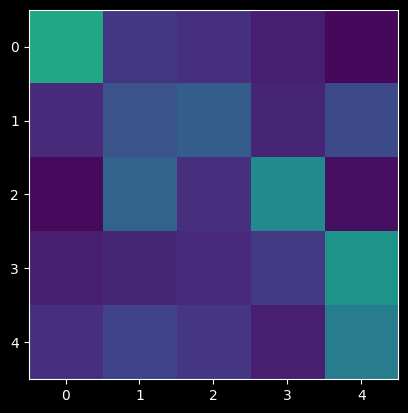

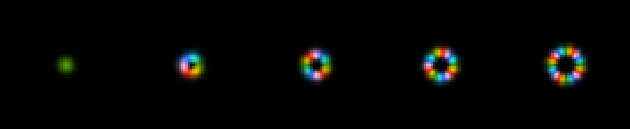

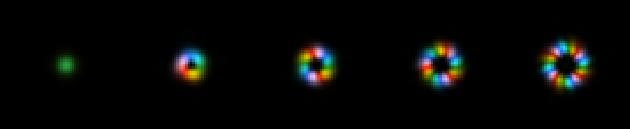

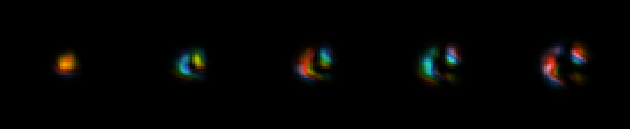

In [11]:
beams1go=[propChannel(OAM(i),z,1,0) for i in progress(range(5))]
beams=[propChannel(OAM(i),z,len(abbs),0) for i in progress(range(5))]
errorBeams=[propChannel(OAM(i),z,abbs,0) for i in progress(range(5))]

plotCrosstalk(crosstalk(beams,errorBeams))
plotBeam(beams1go)
plotBeam(beams)
plotBeam(errorBeams)

## EigenModes

100%|██████████| 48/48 [00:44<00:00,  1.07it/s]


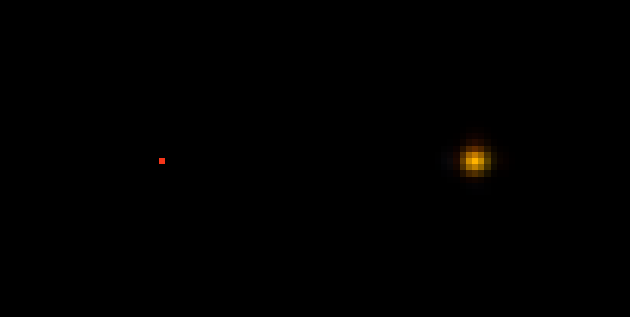

In [12]:
#Create the input and output pixel modes

F=Begin(size,wavelength,N)
F=SubPhase(F,np.zeros((N,N)))
intenseAll=[]
initBeams=[]
endFields=[]

for j in progress(range(N)):
#for j in progress(range(int(2*N/8),int(6*N/8))):
    for i in range(N):
    #for i in range(int(2*N/8),int(6*N/8)):
        intens=np.zeros((N,N))
        intens[j][i]=1
        intenseAll.append(intens)
        F=SubIntensity(F,intens)
        initBeams.append(F)
        endFields.append(np.array(propChannel(F,z,abbs,'0').field).reshape(N**2))
        #endFields.append(np.array(propChannel(F,z,abbs,'0').field[int(2*N/8):int(6*N/8)][int(2*N/8):int(6*N/8)]).reshape(int((N/2)**2)))


#propagate one example beam
plotBeam([initBeams[int((len(initBeams)+np.sqrt(len(initBeams)))/2)],propChannel(initBeams[int((len(initBeams)+np.sqrt(len(initBeams)))/2)],z,abbs,'1')])

In [13]:
#Calculate the EigenValues and EigenVectors of the propagation
transferMatrix=np.transpose(endFields)
eigVals,eigVecs=np.linalg.eig(transferMatrix)

#Get the absolute values and phases of the eigenvalues
eigMags=abs(eigVals)
eigPhases=[cmath.phase(eig) for eig in eigVals]

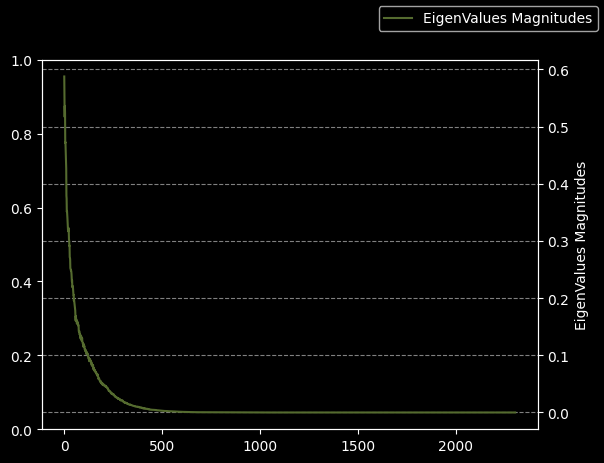

In [14]:
# Plot the eigenvalues

fig, ax1 = plt.subplots()
x=range(0,len(eigPhases))
ax2 = ax1.twinx()
ax2.yaxis.grid(True)
ax2.grid(visible=True,which='major',axis='both',color='gray',linestyle='--')
#ax1.set_ylabel('EigenValues Phases')
ax2.set_ylabel('EigenValues Magnitudes')


#ax1.plot(x,eigPhases,label='EigenValues Phases',color='darkviolet')
#ax1.plot(x,eigPhases,label='EigenValues Phases')
ax2.plot(x,eigMags,label='EigenValues Magnitudes',color='darkolivegreen')
#ax2.plot(x,eigMags,label='EigenValues Magnitudes')

fig.legend()
plt.show()

In [15]:
#Making Eigenvector optical modes

eigenBeams,propNoTurbEigenBeams,propEigenBeams=[],[],[]
for i in progress(range(len(eigVecs))):
    mode=eigVecs[:,i]
    eigenInt=[abs(val)**2 for val in mode]
    #eigenInt=np.pad(np.array(eigenInt).reshape((int(4*N/8),int(4*N/8))),pad_width=int(N/4), mode='constant', constant_values=0)
    eigenInt=np.pad(np.array(eigenInt).reshape((N,N)),pad_width=int(0), mode='constant', constant_values=0)
    eigenPhase=[cmath.phase(val) for val in mode]
    #eigenPhase=np.pad(np.array(eigenPhase).reshape((int(4*N/8),int(4*N/8))),pad_width=int(N/4), mode='constant', constant_values=0)
    eigenPhase=np.pad(np.array(eigenPhase).reshape((N,N)),pad_width=int(0), mode='constant', constant_values=0)
    F=Begin(size,wavelength,N)
    F=SubPhase(SubIntensity(F,eigenInt),eigenPhase)
    F=Normal(F)
    eigenBeams.append(F)

print('Largest Eigenvalue: ', np.argmax(eigMags),'Lowest Eigenvalue: ',np.argmin(eigMags))
#plotBeam(eigenBeams[np.argmax(eigMags)])

100%|██████████| 2304/2304 [00:06<00:00, 333.79it/s]

Largest Eigenvalue:  0 Lowest Eigenvalue:  2301


In [16]:
# Propagated EigenBeams
eigenBeamsProp=[propChannel(beam,z,abbs,'0') for beam in eigenBeams]

In [17]:
# Find ratio of power
eigenPower = [Power(beam) for beam in eigenBeams]
eigenPowerProp = [Power(beam) for beam in eigenBeamsProp]

In [18]:
print(Power(eigenBeams[6]),Power(eigenBeamsProp[6]))

1.0000000000000002 0.2235363267483138


In [19]:
PowerRatio= [out/input for out,input in zip(eigenPowerProp,eigenPower)]

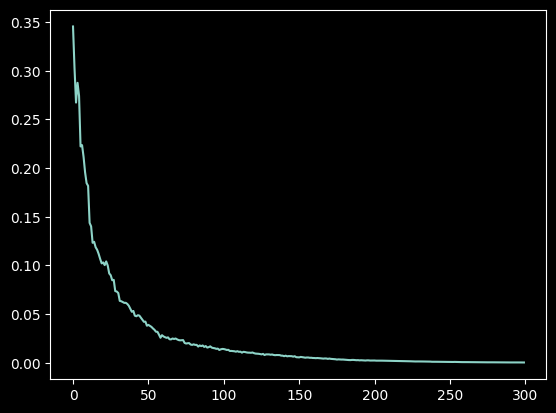

In [20]:
plt.plot(PowerRatio[:300])
plt.show()

0.7809486353762167 0.396900301447262


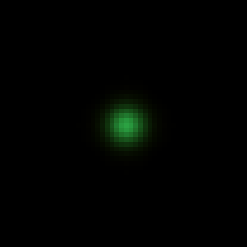

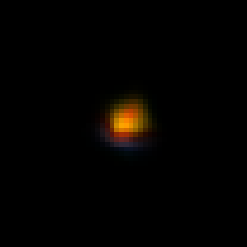

In [21]:
plotBeam(propChannel(OAM(0),z,len(abbs)))
plotBeam(propChannel(OAM(0),z,abbs,'0'))

print(Power(propChannel(OAM(0),z,len(abbs))),Power(propChannel(OAM(0),z,abbs,'0')))

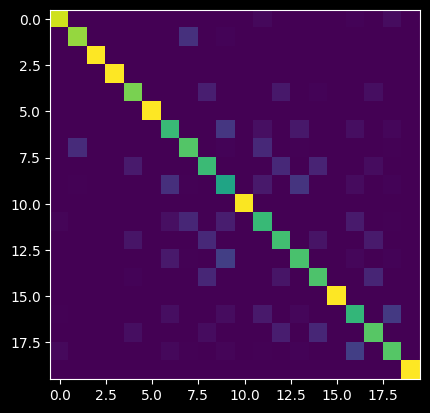

In [22]:
sorted_array = np.flip(np.argsort(eigMags)[-20:])
bestEigenModes=[eigenBeams[index] for index in sorted_array]
bestNoTurbEigenModesProp=[propChannel(eigenBeams[index],z,len(abbs),'0') for index in sorted_array]
bestEigenModesProp=[Normal(propChannel(eigenBeams[index],z,abbs,'0')) for index in sorted_array]
plotCrosstalk(crosstalk(bestEigenModes,bestEigenModesProp))

In [23]:
#All beams that fit in an aperture

W=Begin(size,wavelength,N)
W=CircAperture(0.95*size/2,0,0,W)
#Power(eigenBeamsProp[index]),Power(SubIntensity(eigenBeamsProp[index],np.multiply(Intensity(eigenBeamsProp[index]),Intensity(W))))
eigenBeamsPropAperture = []
eigenBeamsPropApertureIndex=[]
for index in progress(range(len(eigenBeamsProp))):
    #print(Power(SubIntensity(eigenBeamsProp[index],np.multiply(Intensity(eigenBeamsProp[index]),Intensity(W))))>0.99)
    #plotBeam(SubIntensity(eigenBeamsProp[index],np.multiply(Intensity(eigenBeamsProp[index]),Intensity(W))))
    if Power(SubIntensity(eigenBeamsProp[index],np.multiply(Intensity(Normal(eigenBeamsProp[index])),Intensity(W))))>0.99:
        eigenBeamsPropAperture.append(eigenBeamsProp[index])
        eigenBeamsPropApertureIndex.append(index)
print('There are ',len(eigenBeamsPropAperture), ' modes that fit 99% within an aperture of size ', 0.99*2*size, 'm')

100%|██████████| 2304/2304 [00:01<00:00, 1335.29it/s]

There are  61  modes that fit 99% within an aperture of size  0.21999978 m


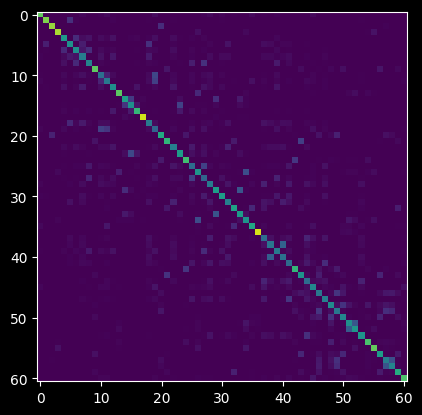

In [24]:
plotCrosstalk(crosstalk(eigenBeamsPropAperture,eigenBeamsPropAperture))

0.9978001998410273


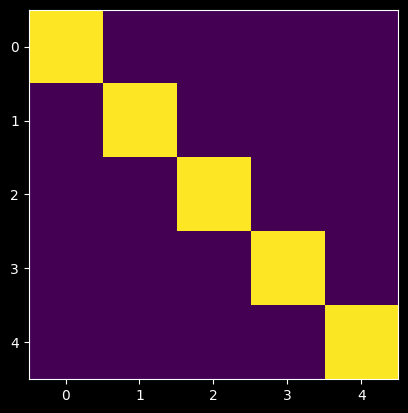

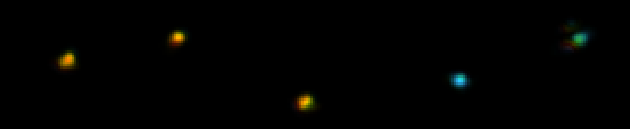

In [34]:
# Picking the best orthogonality of aperture fitting beams
picks=range(5)
bestEigenBeamsPropAperture=[eigenBeamsPropAperture[pick] for pick in picks]

print(np.trace(crosstalk(bestEigenBeamsPropAperture,bestEigenBeamsPropAperture))/len(bestEigenBeamsPropAperture))
plotCrosstalk(crosstalk(bestEigenBeamsPropAperture,bestEigenBeamsPropAperture))

plotBeam(bestEigenBeamsPropAperture)

  Eigenbeam in        -      Eigenbeam out       -       l=2 -               l=4


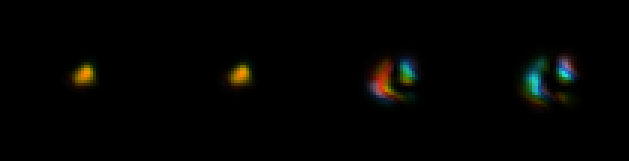

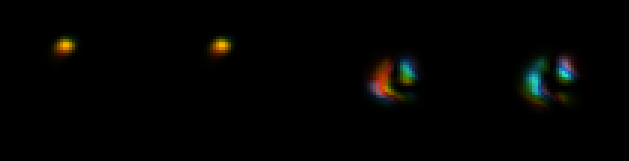

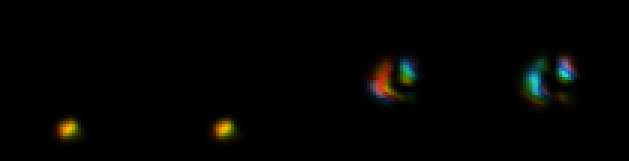

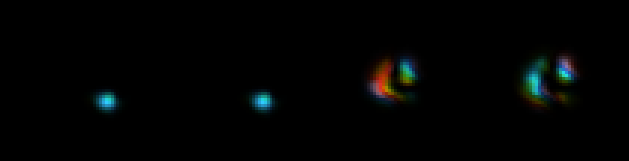

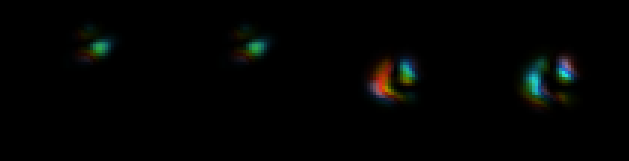

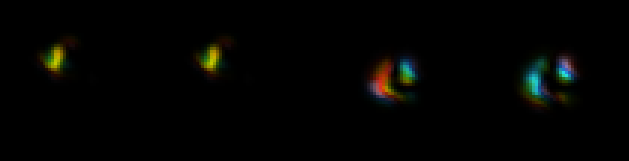

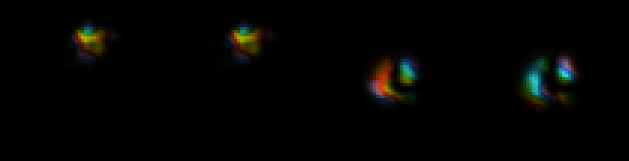

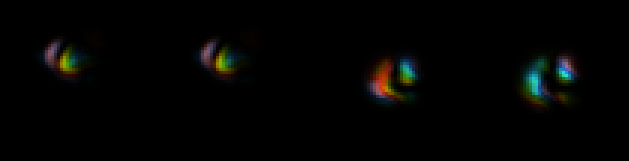

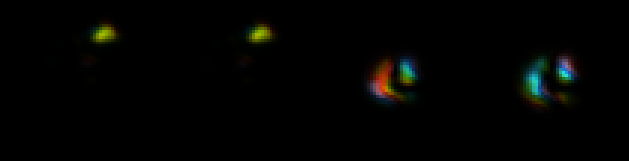

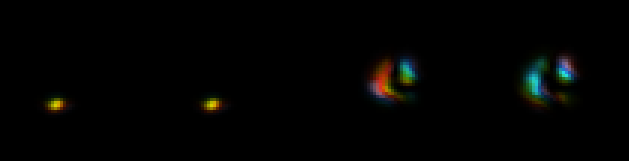

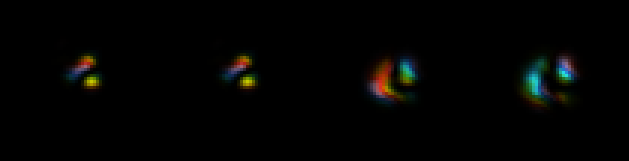

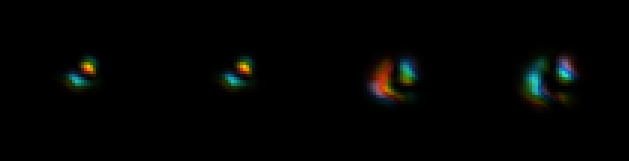

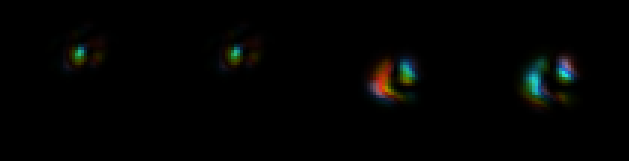

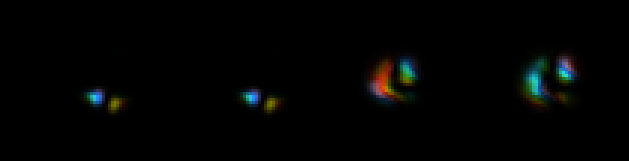

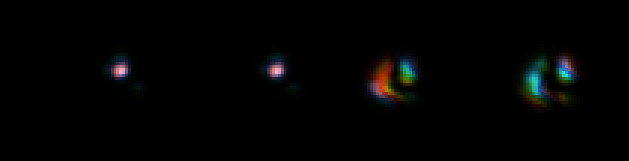

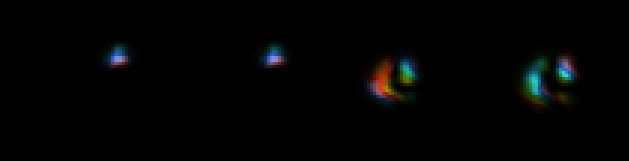

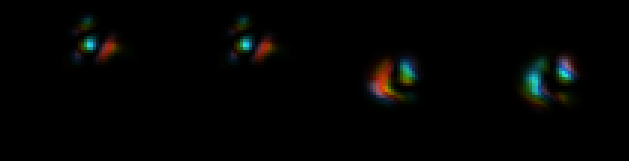

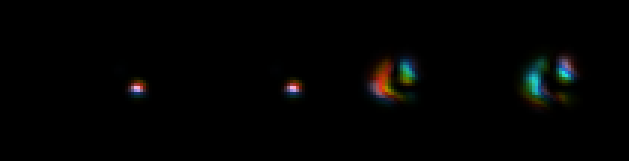

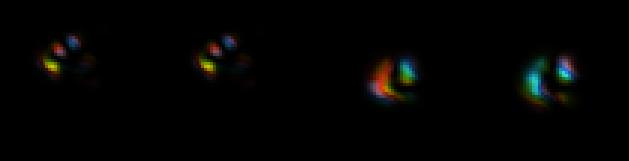

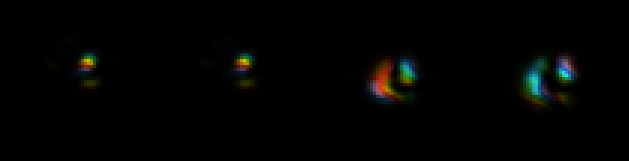

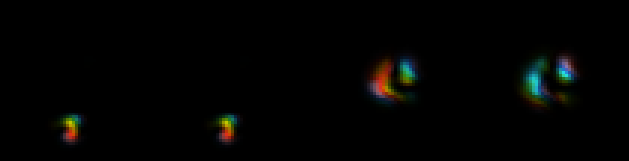

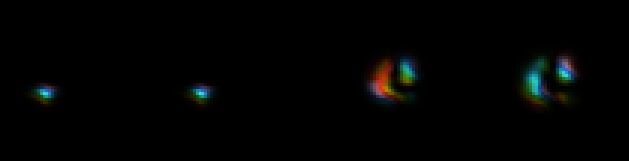

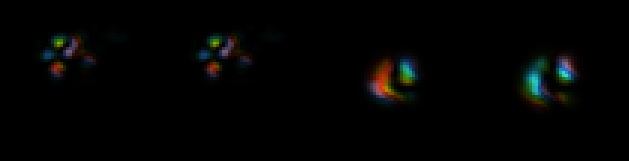

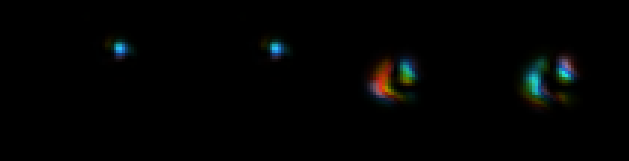

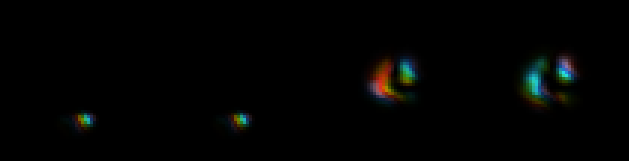

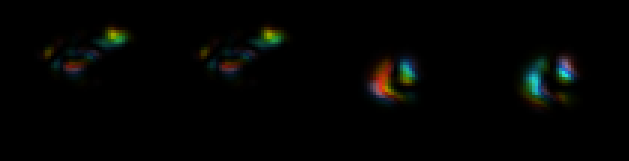

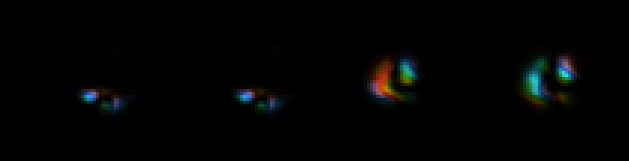

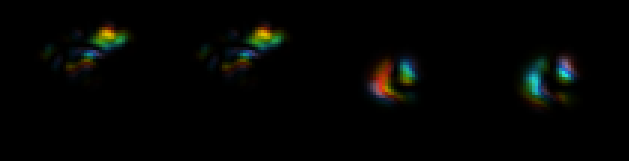

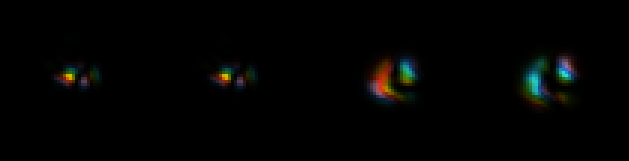

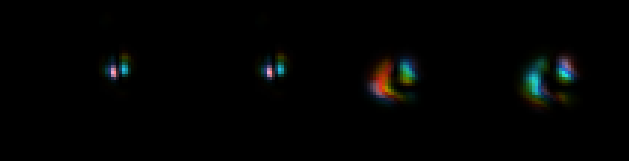

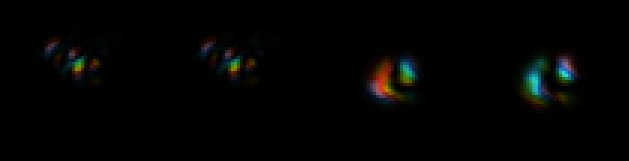

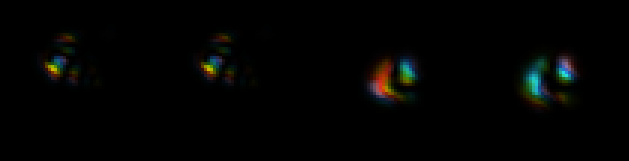

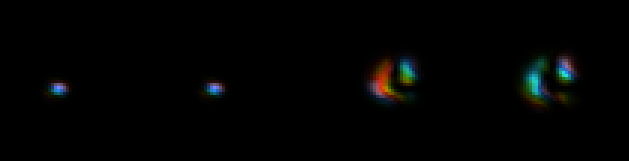

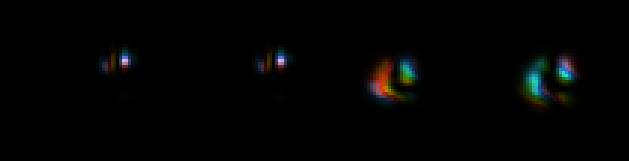

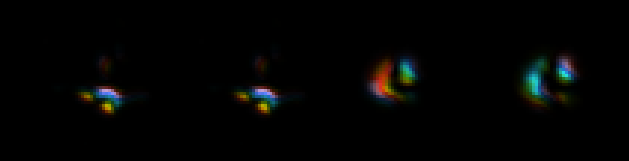

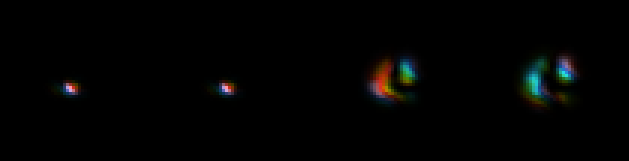

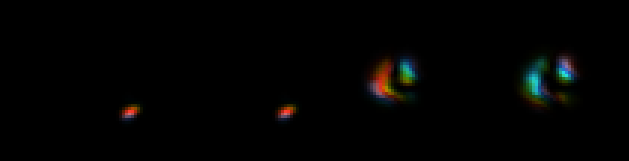

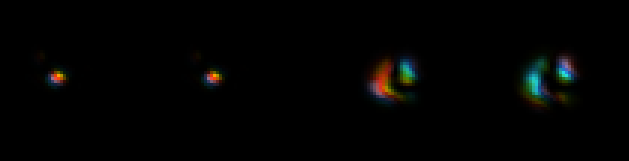

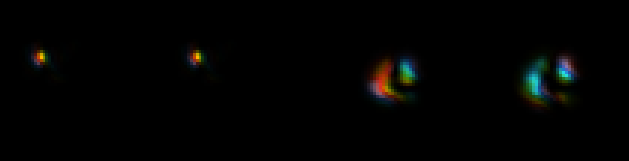

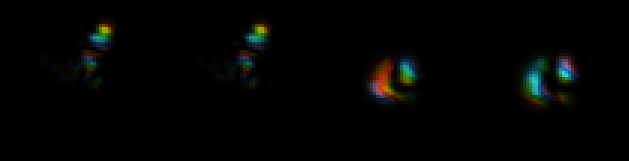

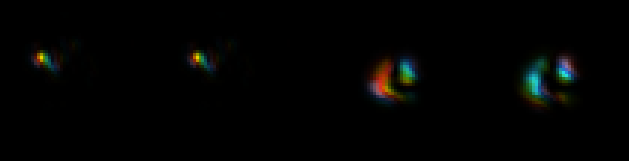

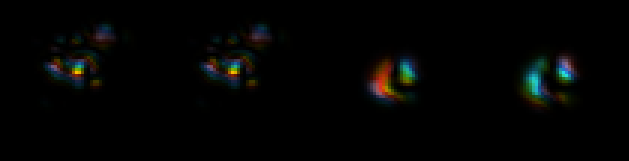

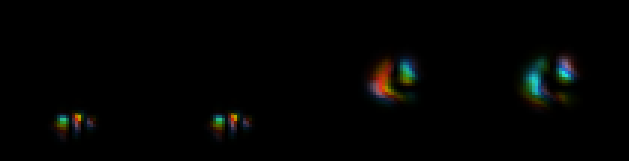

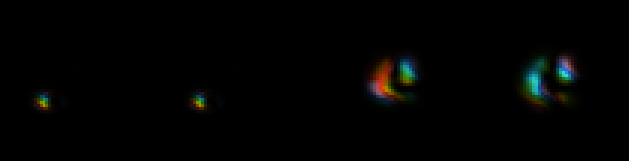

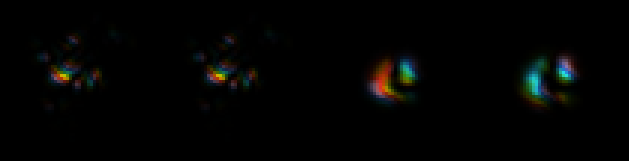

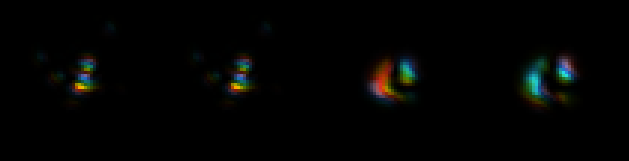

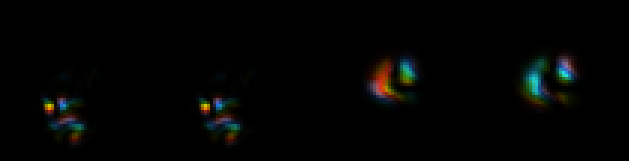

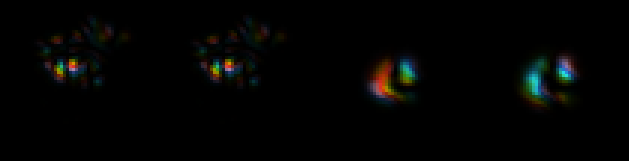

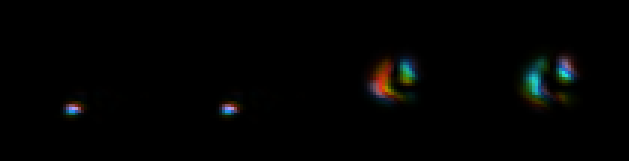

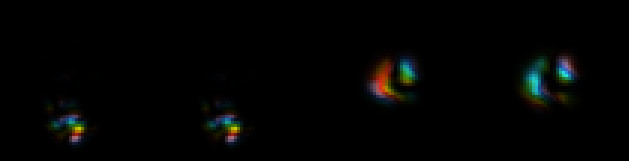

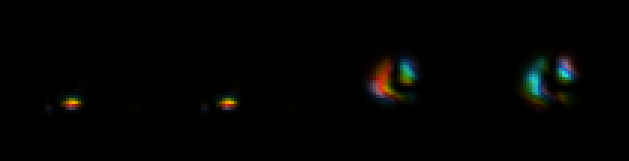

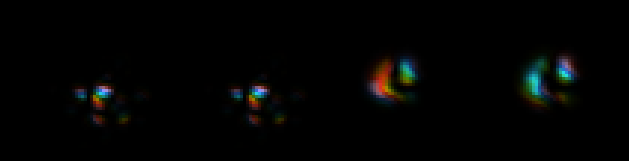

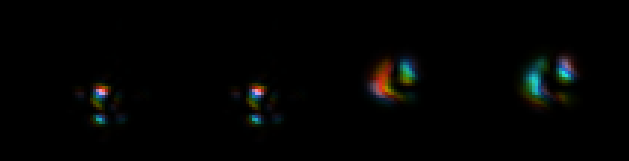

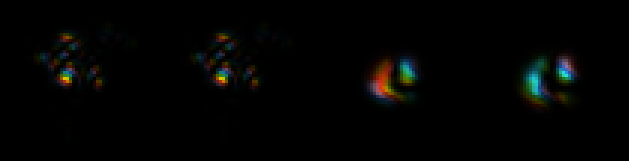

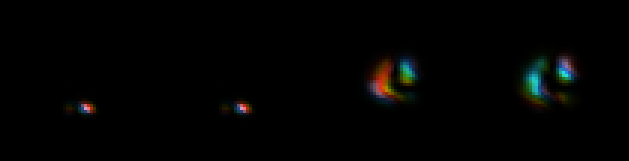

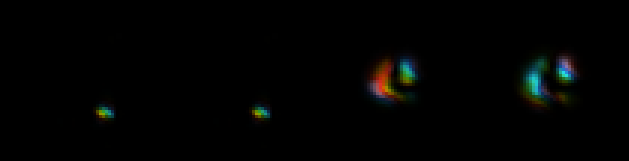

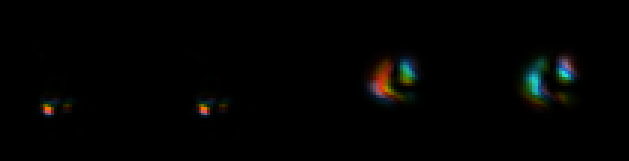

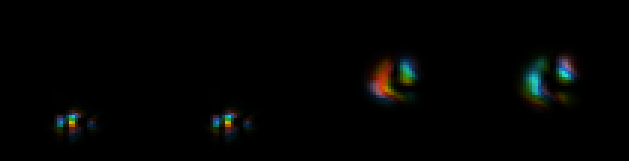

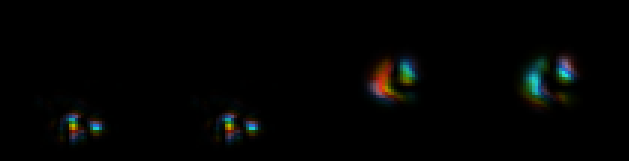

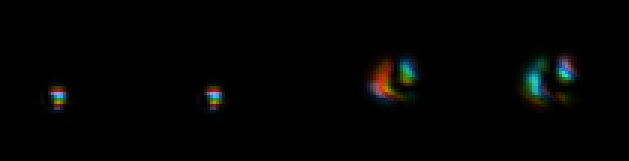

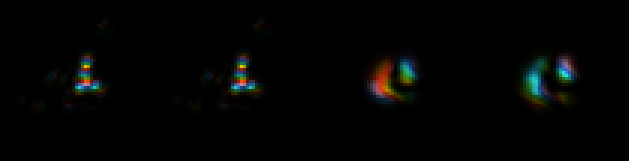

In [26]:
print("  Eigenbeam in        -      Eigenbeam out       -       l=2 -               l=4")
for beam1,beam2 in zip([eigenBeamsProp[i] for i in eigenBeamsPropApertureIndex],eigenBeamsPropAperture):
    plotBeam([beam1,beam2]+[propChannel(OAM(i),z,abbs,'0') for i in range(2,4)])

  Eigenbeam in        -      Eigenbeam out       -       l=2 -               l=4


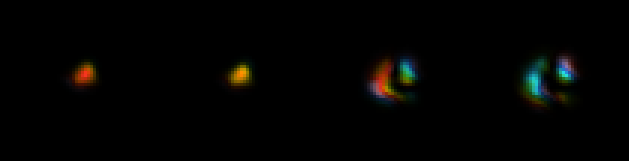

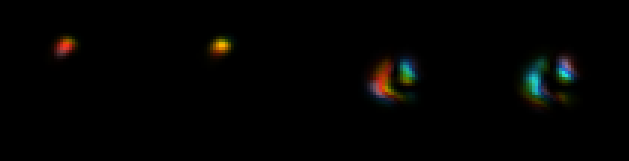

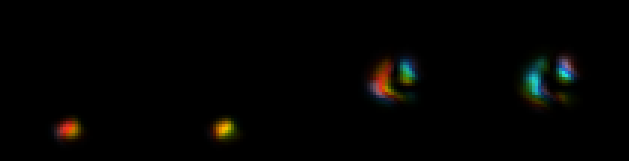

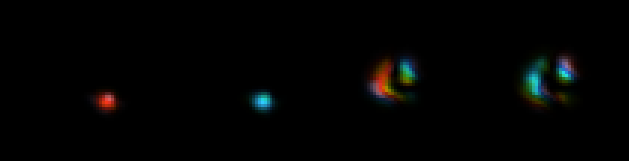

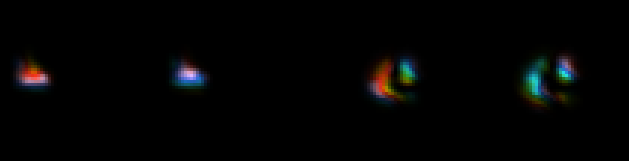

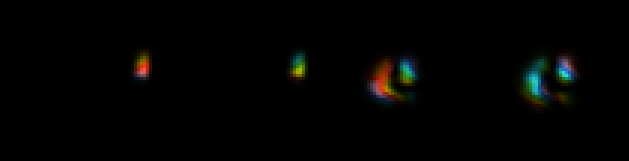

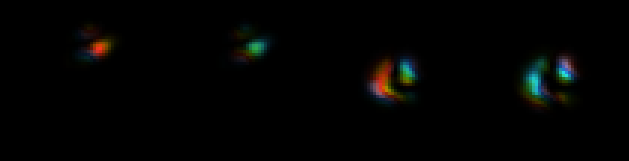

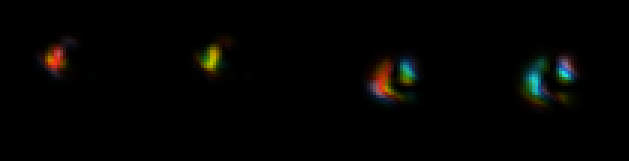

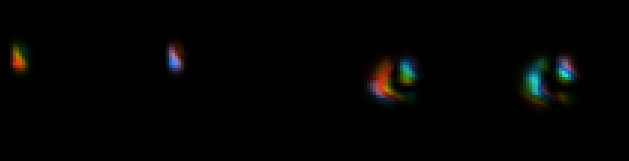

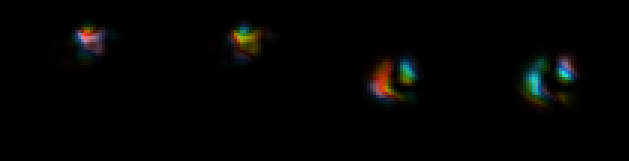

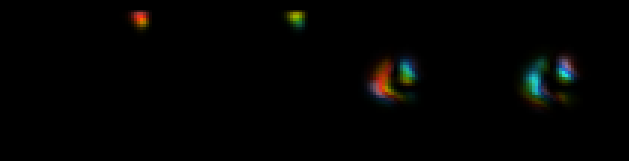

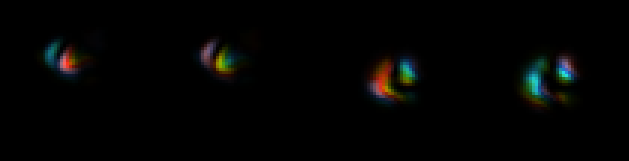

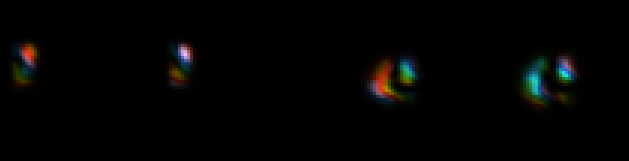

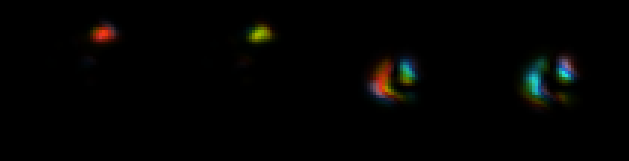

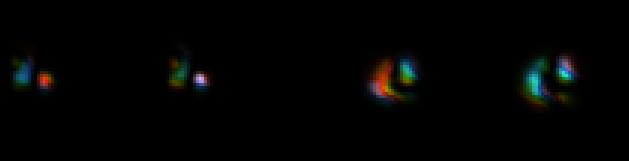

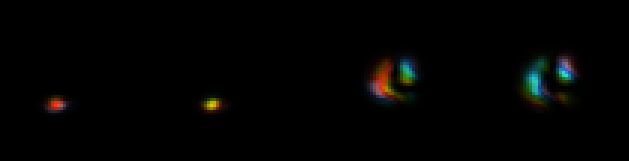

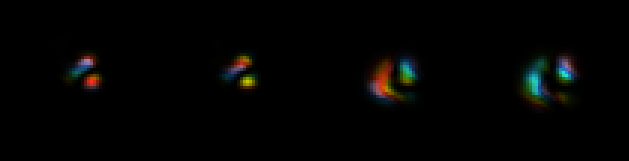

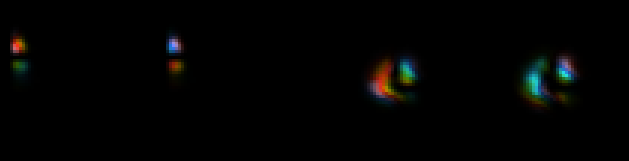

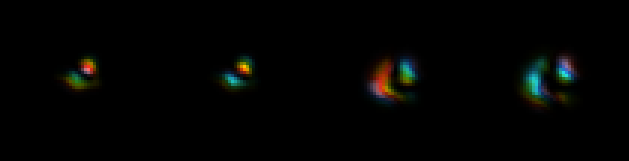

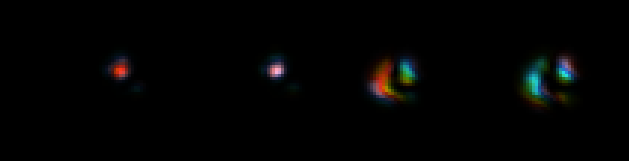

In [27]:
print("  Eigenbeam in        -      Eigenbeam out       -       l=2 -               l=4")
for beam1,beam2,beam3 in zip(bestEigenModes,bestEigenModesProp,bestNoTurbEigenModesProp):
    plotBeam([beam1,beam2]+[propChannel(OAM(i),z,abbs,'0') for i in range(2,4)])

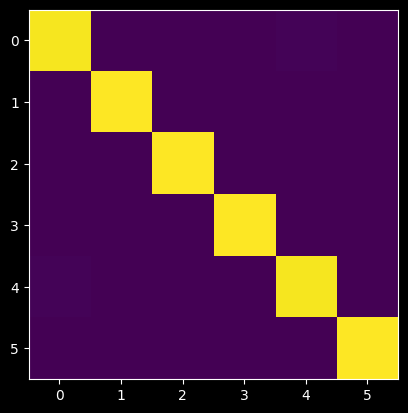

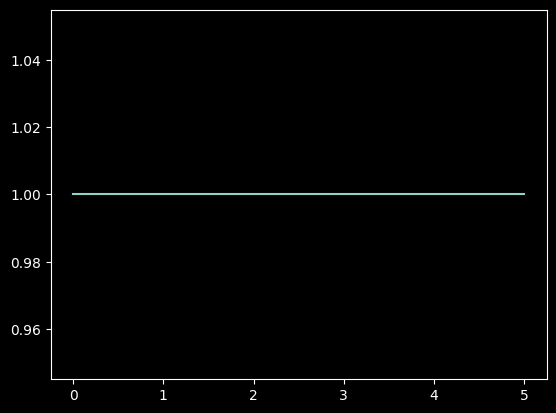

In [28]:
customPick=[0,1,2,5,16,17]

customEigenModes=[bestEigenModes[i] for i in customPick]
customEigenModesProp=[bestEigenModesProp[i] for i in customPick]

customPower=[Power(output)/Power(input) for output,input in zip(customEigenModesProp,customEigenModes)]

plotCrosstalk(crosstalk(customEigenModes,customEigenModesProp))
plt.plot(customPower)
plt.show()

Eigenbeam in  - Eigenbeam out


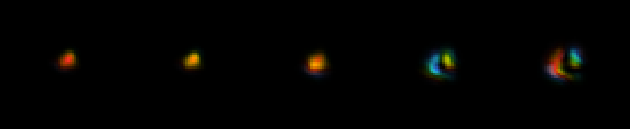

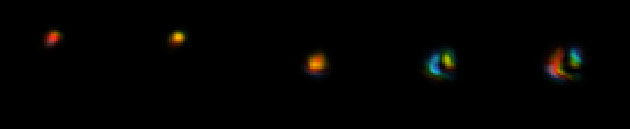

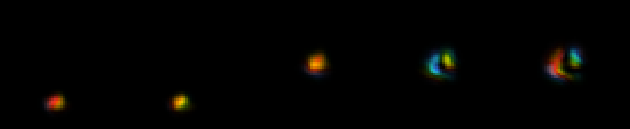

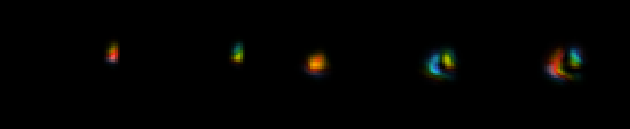

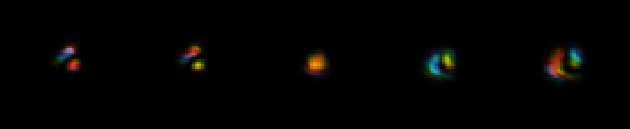

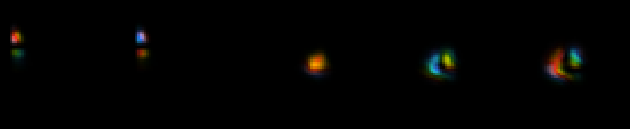

In [29]:
print("Eigenbeam in  - Eigenbeam out")
for beam,beamprop in zip(customEigenModes,customEigenModesProp):
    plotBeam([beam,beamprop]+[propChannel(OAM(i),z,abbs) for i in range(3)])

## EigenModes OAM

## Attempt at Schur decomposition

In [774]:
schurVals,schurVecs=sp.linalg.schur(transferMatrix)

In [ ]:
#Making schurvector optical modes
schurBeams,propSchurBeams=[],[]
for i in progress(range(len(schurVecs))):
    mode=schurVecs[:,i]
    schurInt=[abs(val)**2 for val in mode]
    #schurInt=np.pad(np.array(schurInt).reshape((int(4*N/8),int(4*N/8))),pad_width=int(N/4), mode='constant', constant_values=0)
    schurInt=np.pad(np.array(schurInt).reshape((N,N)),pad_width=int(0), mode='constant', constant_values=0)
    schurPhase=[cmath.phase(val) for val in mode]
    #schurPhase=np.pad(np.array(schurPhase).reshape((int(4*N/8),int(4*N/8))),pad_width=int(N/4), mode='constant', constant_values=0)
    schurPhase=np.pad(np.array(schurPhase).reshape((N,N)),pad_width=int(0), mode='constant', constant_values=0)
    F=Begin(size,wavelength,N)
    F=SubPhase(SubIntensity(F,schurInt),schurPhase)
    schurBeams.append(F)
    propSchurBeams.append(propChannel(F,z,abbs))
bestSchur=schurBeams[:20]
bestPropSchur=propSchurBeams[:20]

In [ ]:
plotCrosstalk(crosstalk(bestSchur,bestSchur))
plotCrosstalk(crosstalk(bestPropSchur,bestSchur))
print("Schurbeam in  - Schurbeam out")
for beam,propBeam in zip(bestSchur,bestPropSchur):
    plotBeam([beam,propBeam]+[propChannel(OAM(i),z,abbs) for i in range(3)])

## SVD Decomposition

In [770]:
U,S,Vh=np.linalg.svd(transferMatrix, full_matrices=True)

In [771]:
#Making SVD Input Modes

SVDBeams,propSVDBeams=[],[]
for i in range(len(Vh)):
    mode=Vh[i]
    eigenInt=[abs(val)**2 for val in mode]
    #eigenInt=np.pad(np.array(eigenInt).reshape((int(4*N/8),int(4*N/8))),pad_width=int(N/4), mode='constant', constant_values=0)
    eigenInt=np.pad(np.array(eigenInt).reshape((N,N)),pad_width=int(0), mode='constant', constant_values=0)
    eigenPhase=[cmath.phase(val) for val in mode]
    #eigenPhase=np.pad(np.array(eigenPhase).reshape((int(4*N/8),int(4*N/8))),pad_width=int(N/4), mode='constant', constant_values=0)
    eigenPhase=np.pad(np.array(eigenPhase).reshape((N,N)),pad_width=int(0), mode='constant', constant_values=0)
    F=Begin(size,wavelength,N)
    F=SubPhase(SubIntensity(F,eigenInt),eigenPhase)
    SVDBeams.append(F)
    propSVDBeams.append(propChannel(F,z,abbs))

In [772]:
#Making SVD Output Modes

outSVDBeams=[]
for i in range(len(U)):
    mode=U[:,i]
    eigenInt=[abs(val)**2 for val in mode]
    eigenInt=np.pad(np.array(eigenInt).reshape((N,N)),pad_width=0, mode='constant', constant_values=0)
    eigenPhase=[cmath.phase(val) for val in mode]
    eigenPhase=np.pad(np.array(eigenPhase).reshape((N,N)),pad_width=0, mode='constant', constant_values=0)
    F=Begin(size,wavelength,N)
    F=SubPhase(SubIntensity(F,eigenInt),eigenPhase)
    outSVDBeams.append(F)

In [ ]:
print("SVD Beam in  SVD Beam Prop   SVD Beam out")
for beam,propBeam,outBeam in zip(SVDBeams[:20],propSVDBeams[:20],outSVDBeams[:20]):
    plotBeam([beam,propBeam,outBeam]+[propChannel(OAM(i),z,abbs) for i in range(3)])

# Saving figures

In [ ]:
#Plot all abberations and then the final abberation if they were summed

allAbbs=[aotools.turbulence.phasescreen.ft_sh_phase_screen(r0,N,size/N,100,0.001) for i in range(n)]
singleAbb=np.sum(abbs,axis=0)
allAbbs.append(singleAbb)
for screen in allAbbs:
    im = plt.imshow(np.mod(screen+np.min(screen),2*np.pi), interpolation='none', cmap=pmap,vmax=2*np.pi,vmin=0)
    plt.show()

In [ ]:
#Save figures of all of the OAMs 
N=1024
ls=ell(8)
for i in progress(ls):
            savebeam(OAM(i),'OAM'+str(i))

In [ ]:
#Save figures of all of the ANGs 
N=1024
for dim in progress([2,3,4,5,6,7,8]):
    ls=ell(dim)
    for i in progress(range(dim)):
                savebeam(ANG(dim,i),'ANG'+str(i))